# Chapter 4: 可視化と最適化編

前章で出てきた`matplotlib`と，『集合知プログラミング』における最適化について学ぶ．

1. `matplotlib`について
2. `pandas`について
3. 『集合知プログラミング』における最適化
    1. ランダムサーチ
    2. 最急降下法
    3. 焼きなまし
    4. 遺伝的アルゴリズム 

## 4-1. `matplotlib`について
`matplotlib`は，データの可視化でよく用いられるモジュール．

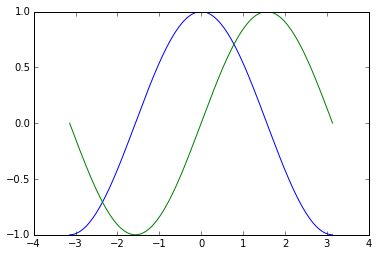

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# matplotlibの表示をJupyter内で行うための「おまじない」

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
plt.plot(X, np.cos(X))
plt.plot(X, np.sin(X))

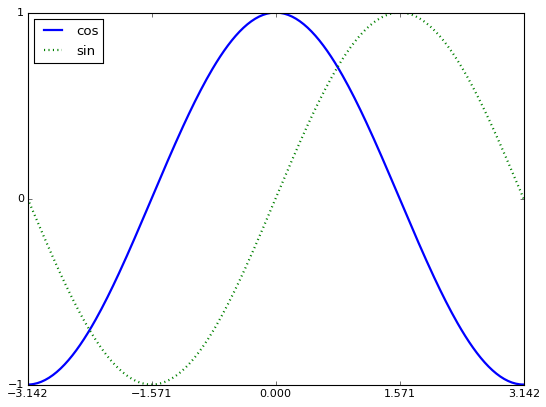

In [2]:
plt.figure(figsize=(8,6), dpi=80) # リサイズ
plt.xlim(-np.pi, np.pi) # x軸方向の最大値，最小値を決める

plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])


X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
plt.plot(X, np.cos(X), color='blue', linewidth=2.0, linestyle='-', label='cos') # 線のスタイル，幅などを変更できる
plt.plot(X, np.sin(X), color='green', linewidth=2.0, linestyle=':', label='sin')
plt.legend(loc='upper left')

## 4-2. `pandas`について

`pandas`: csvやRDBのような形式のデータを操作するためによく用いられるモジュール．

参考資料: [official document](https://pandas.pydata.org/pandas-docs/stable/index.html)

In [3]:
import pandas as pd

name = pd.Series(['Mike', 'John', 'Ken', 'Maki', 'Lisa'], name='name') # RDBの1列
country = pd.Series(['USA', 'UK', 'Japan', 'China', 'USA'], name='country')
score = pd.Series([1, 3, 5, 4, 3], name='score')
df = pd.DataFrame({'name':name, 'country':country, 'score':score}) # RDB全体
df.head()

,country,name,score
0,USA,Mike,1
1,UK,John,3
2,Japan,Ken,5
3,China,Maki,4
4,USA,Lisa,3


describe関数を使うことで，DataFrame中の数値列の統計値が確認できる．  
- count
- mean, std 
- 25%, 50%, 75%
- min, max

In [4]:
df.describe() 

,score
count,5.00000
mean,3.20000
std,1.48324
min,1.00000
25%,3.00000
50%,3.00000
75%,4.00000
max,5.00000


列名を指定することで，その列のみ表示することができる．  
(複数行の場合，列名のリストで指定する)

In [5]:
df[['country', 'score']]

,country,score
0,USA,1
1,UK,3
2,Japan,5
3,China,4
4,USA,3


条件をつけてDataFrameの部分を取り出せる

In [6]:
df[df['score'] >= 3] 

,country,name,score
1,UK,John,3
2,Japan,Ken,5
3,China,Maki,4
4,USA,Lisa,3


In [7]:
!head ./data/sample.csv # csvの中身

name,age,score
"太郎",17,69
"二郎",16,75
"三郎",15,87
"四郎",12,61
"五郎",,

ファイルパスを指定して，csvファイルをpandasのDataFrameにすることができる．  
このサンプルデータにおいて，"五郎"の行は値が欠損している．

In [8]:
df = pd.read_csv('./data/sample.csv')
df.head()

,name,age,score
0,太郎,17.0,69.0
1,二郎,16.0,75.0
2,三郎,15.0,87.0
3,四郎,12.0,61.0
4,五郎,NaN,NaN


## 4-3. 『集合知プログラミング』における最適化

『集合知プログラミング』では，旅行コストの最適化問題を例題として解いている．  
旅行に関わる様々なコストを定量化し，最小化する．

### 4-3-1. ランダムサーチ
ランダムに探索する方法．  
探索する空間の中でランダムに1点を決め，関数値を計算する．その関数値が最大(または最小)となる点を出力する．

### 4-3-2. 最急降下法
ある点xで勾配を計算し，その方向に向かってΔx移動する．という手順を繰り返すことで，最適解を探索する方法．  

#### 特徴
- 最適化する関数が微分可能で凸な場合，最適解を求められる．
- 非凸な場合，局所解に落ちる
    - これに対処するためには何回も初期値を変えて繰り返す必要がある．

### 4-3-3. 焼きなまし法
ある確率で勾配方向とは逆に動くことを許容した方法．  
初期状態に近いときほど，勾配方向とは反対に動くことができるが，繰り返しが進むにつれて，その確率が小さくなる．  

#### 特徴
- 非凸な場合でも，局所解から逃れる可能性がある．

### 4-3-4. 遺伝的アルゴリズム
選択，交配(交叉)と突然変異をもとにした，最適化アルゴリズム．  


#### 用語の定義
- 個体: 解空間の中の1点
- 染色体: 遺伝子の配列
- 遺伝子: 遺伝情報を表す文字やビット
- 適応度: 個体がどの程度環境に適応しているかを表す指標
- 遺伝的操作
    - 選択: 適応度に合わせて次の世代の交配に用いる個体を選ぶ操作
    - 交配(交叉): 2つの個体の染色体を組み替えて，子の染色体を作る操作
    - 突然変異: 染色体の一部を一定の確率で変化させる操作

#### 特徴
- 様々な問題に対して応用できる適用範囲の広い探索アルゴリズム
- 数学的な解析が進んでいない


## [練習問題](./../exercise/question4.md)